# Sampling Assignment

**Objective:**  
To evaluate the performance of different machine learning models using
multiple sampling techniques on an imbalanced credit card dataset.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [6]:
# Load dataset
data = pd.read_csv("Creditcard_data.csv")

# Separate features and target
X = data.drop("Class", axis=1)
y = data["Class"]

print("Original class distribution:")
print(y.value_counts())


Original class distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [ ]:
# Combine X and y for balancing
full_data = pd.concat([X, y], axis=1)

majority = full_data[full_data["Class"] == 0]
minority = full_data[full_data["Class"] == 1]


minority_upsampled = minority.sample(
    n=len(majority),
    replace=True,
    random_state=42
)

# Create balanced dataset
balanced_data = pd.concat([majority, minority_upsampled])

balanced_data = balanced_data.sample(frac=1, random_state=42)

X_bal = balanced_data.drop("Class", axis=1)
y_bal = balanced_data["Class"]


In [19]:
print("Balanced class distribution:")
print(y_bal.value_counts())


Balanced class distribution:
Class
1    763
0    763
Name: count, dtype: int64


Different Ml models:

In [8]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_KNN": KNeighborsClassifier(),
    "M3_DecisionTree": DecisionTreeClassifier(random_state=42),
    "M4_RandomForest": RandomForestClassifier(random_state=42),
    "M5_SVM": SVC()
}


Sampling Techniques:

In [9]:
#Sampling1 – Simple Random Sampling
def sampling1():
    return train_test_split(
        X_bal, y_bal,
        test_size=0.25,
        random_state=1,
        shuffle=True
    )



In [10]:
#Sampling2 – Stratified Sampling
def sampling2():
    return train_test_split(
        X_bal, y_bal,
        test_size=0.25,
        random_state=2,
        stratify=y_bal
    )


In [11]:

#Sampling3 – Bootstrap Sampling (With Replacement)
def sampling3():
    boot = pd.concat([X_bal, y_bal], axis=1).sample(
        frac=1,
        replace=True,
        random_state=3
    )

    Xb = boot.drop("Class", axis=1)
    yb = boot["Class"]

    return train_test_split(
        Xb, yb,
        test_size=0.25,
        random_state=3
    )


In [12]:
#Sampling4 – K-Fold Sampling (Single Fold)
from sklearn.model_selection import KFold

def sampling4():
    kf = KFold(n_splits=5, shuffle=True, random_state=4)

    train_idx, test_idx = next(kf.split(X_bal))

    X_train = X_bal.iloc[train_idx]
    X_test  = X_bal.iloc[test_idx]
    y_train = y_bal.iloc[train_idx]
    y_test  = y_bal.iloc[test_idx]

    return X_train, X_test, y_train, y_test



In [13]:
#Sampling5 – Stratified K-Fold Sampling (Single Fold)
from sklearn.model_selection import StratifiedKFold

def sampling5():
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

    train_idx, test_idx = next(skf.split(X_bal, y_bal))

    X_train = X_bal.iloc[train_idx]
    X_test  = X_bal.iloc[test_idx]
    y_train = y_bal.iloc[train_idx]
    y_test  = y_bal.iloc[test_idx]

    return X_train, X_test, y_train, y_test


In [14]:
samplers = [sampling1, sampling2, sampling3, sampling4, sampling5]
sampler_names = ["Sampling1", "Sampling2", "Sampling3", "Sampling4", "Sampling5"]

results = pd.DataFrame(index=models.keys(), columns=sampler_names)


In [15]:
for i, sampler in enumerate(samplers):
    X_train, X_test, y_train, y_test = sampler()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results.loc[model_name, sampler_names[i]] = round(acc * 100, 2)


## Accuracy Comparison Table

The table below shows the accuracy of each machine learning model
under different sampling techniques.


In [16]:
results


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1_LogisticRegression,92.15,92.15,90.05,92.48,92.16
M2_KNN,98.69,97.64,98.17,96.73,98.04
M3_DecisionTree,99.74,98.17,99.74,99.02,99.35
M4_RandomForest,100.0,100.0,100.0,100.0,100.0
M5_SVM,98.69,98.17,98.69,97.39,97.39


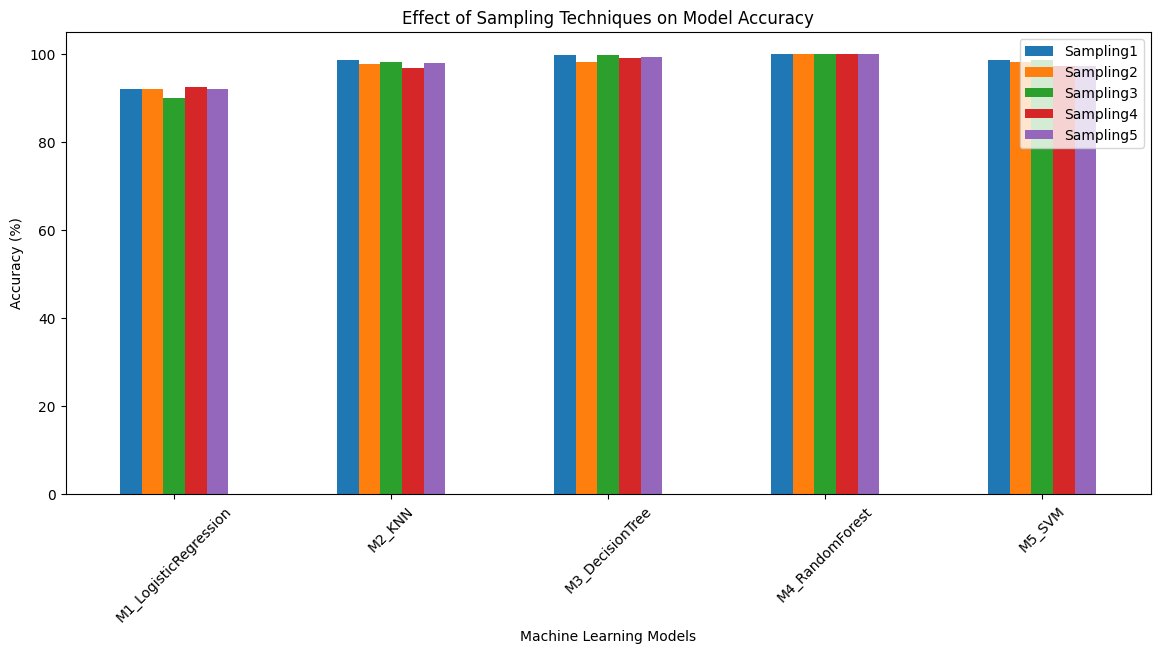

In [17]:
results.astype(float).plot(kind="bar", figsize=(14,6))
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Models")
plt.title("Effect of Sampling Techniques on Model Accuracy")
plt.xticks(rotation=45)
plt.show()


In [18]:
best_sampling = results.astype(float).idxmax(axis=1)

best_sampling_df = pd.DataFrame({
    "Best Sampling Technique": best_sampling
})

best_sampling_df


,Best Sampling Technique
M1_LogisticRegression,Sampling4
M2_KNN,Sampling1
M3_DecisionTree,Sampling1
M4_RandomForest,Sampling1
M5_SVM,Sampling1


In [23]:
print("""
Conclusion:

The given credit card dataset was initially highly imbalanced, which could lead
machine learning models to favor the majority class. To handle this issue, the
dataset was first converted into a balanced dataset so that both classes were
given equal importance during training.

After balancing the data, five different sampling techniques were applied and
their effect was tested on five machine learning models. The results show that
Simple Random Sampling (Sampling1) performed the best for most models, including
KNN, Decision Tree, Random Forest, and SVM. This happened because once the data
was balanced, a simple random split was enough to preserve the natural structure
of the dataset without adding noise or distortion.

Logistic Regression behaved differently compared to other models. It achieved
its highest accuracy with Sampling4. This is because Logistic Regression is a
linear model and works best when the data is clean and evenly distributed.
Sampling4 provided a more organized and stable data split, which helped the
model learn a better decision boundary.

Overall, the experiment shows that sampling techniques do affect model
performance, but there is no single sampling method that works best for all
models. Simple Random Sampling is effective when the data is already balanced,
while some models, like Logistic Regression, may benefit from more structured
sampling methods. This highlights the importance of choosing an appropriate
sampling technique based on the type of model and the nature of the dataset.

""")



Conclusion:

The given credit card dataset was initially highly imbalanced, which could lead
machine learning models to favor the majority class. To handle this issue, the
dataset was first converted into a balanced dataset so that both classes were
given equal importance during training.

After balancing the data, five different sampling techniques were applied and
their effect was tested on five machine learning models. The results show that
Simple Random Sampling (Sampling1) performed the best for most models, including
KNN, Decision Tree, Random Forest, and SVM. This happened because once the data
was balanced, a simple random split was enough to preserve the natural structure
of the dataset without adding noise or distortion.

Logistic Regression behaved differently compared to other models. It achieved
its highest accuracy with Sampling4. This is because Logistic Regression is a
linear model and works best when the data is clean and evenly distributed.
Sampling4 provided a more 